In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [8]:
df = pd.read_csv("cyberbullying_tweets.csv")

In [44]:
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [42]:
my_tags = ['religion','age','gender','ethnicity','not_cyberbullying','other_cyberbullying']

In [14]:
pd.DataFrame(df.groupby('cyberbullying_type').size().rename('counts')).sort_values('counts', ascending=False)
#all fairly equal in distribution

,counts
cyberbullying_type,
religion,7998
age,7992
gender,7973
ethnicity,7961
not_cyberbullying,7945
other_cyberbullying,7823


<AxesSubplot:>

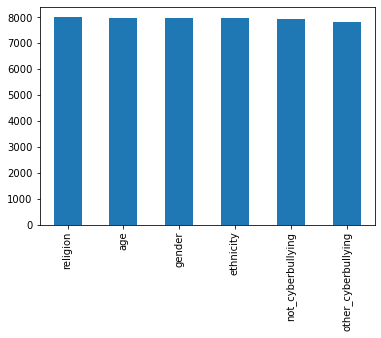

In [17]:
df.cyberbullying_type.value_counts().plot(kind='bar')

In [23]:
X = df.tweet_text
Y = df.cyberbullying_type

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [33]:
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])

In [35]:
sgd.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [36]:
y_pred = sgd.predict(X_test)

In [43]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7790124751022119
                     precision    recall  f1-score   support

           religion       0.81      0.99      0.89      1603
                age       0.88      0.97      0.93      1603
             gender       0.84      0.82      0.83      1531
          ethnicity       0.66      0.43      0.52      1624
  not_cyberbullying       0.64      0.49      0.56      1612
other_cyberbullying       0.76      0.98      0.86      1566

           accuracy                           0.78      9539
          macro avg       0.77      0.78      0.76      9539
       weighted avg       0.76      0.78      0.76      9539

